In [1]:
!pip install opencv-python matplotlib seaborn scikit-learn

In [2]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -- ------------------------------------- 0.6/10.7 MB 11.5 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/10.7 MB 13.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/10.7 MB 12.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.1/10.7 MB 12.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/10.7 MB 5.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.7 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.7 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.7 MB 5.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/10.7 MB 5.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/10.7 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.7 MB 4.9 MB/s eta 0:00:02
   -------

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

✅ Total images loaded: 20000
✅ Total labels collected: 20000
🖼️ Image shape: (64, 64, 1)
🔖 Example label: 01_palm


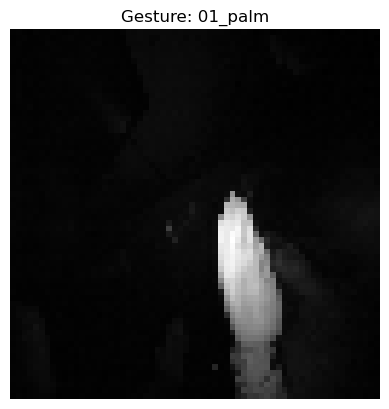

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ✅ Correct dataset path (OneDrive Desktop)
dataset_path = r"C:\Users\ansh nimbalkar\OneDrive\Desktop\gestureproject\leapGestRecog"
IMG_SIZE = 64
X = []
y = []

# Traverse each user folder (00 to 09)
for user_folder in os.listdir(dataset_path):
    user_path = os.path.join(dataset_path, user_folder)

    if os.path.isdir(user_path):
        # Traverse each gesture folder inside user folder
        for gesture_folder in os.listdir(user_path):
            gesture_path = os.path.join(user_path, gesture_folder)

            if os.path.isdir(gesture_path):
                for img_file in os.listdir(gesture_path):
                    if img_file.endswith(".png"):
                        img_path = os.path.join(gesture_path, img_file)
                        
                        # Read, resize, normalize
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        img = img / 255.0
                        
                        X.append(img)
                        y.append(gesture_folder)  # label = gesture

# Convert to numpy
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

# Summary
print("✅ Total images loaded:", len(X))
print("✅ Total labels collected:", len(y))
print("🖼️ Image shape:", X.shape[1:])
print("🔖 Example label:", y[0])

# Optional preview
plt.imshow(X[0].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Gesture: {y[0]}")
plt.axis('off')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert gesture folder names (e.g., '01_palm') to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("✅ Label Encoding & Train-Test Split Complete")
print("🔢 Classes:", list(label_encoder.classes_))
print("🧠 Training samples:", X_train.shape[0])
print("🧪 Testing samples:", X_test.shape[0])

✅ Label Encoding & Train-Test Split Complete
🔢 Classes: ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
🧠 Training samples: 16000
🧪 Testing samples: 4000


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(len(np.unique(y_encoded)), activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10


C:\Users\ansh nimbalkar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.6467 - loss: 1.0591 - val_accuracy: 0.9915 - val_loss: 0.0344
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9850 - loss: 0.0538 - val_accuracy: 0.9983 - val_loss: 0.0065
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9983 - val_loss: 0.0075
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9967 - loss: 0.0134 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 9.2733e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 6.2344e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9982 - loss: 0.0063 - val_accuracy: 0.9995 - val_loss: 0.0013
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9974 - loss: 0.0088 - val_accurac

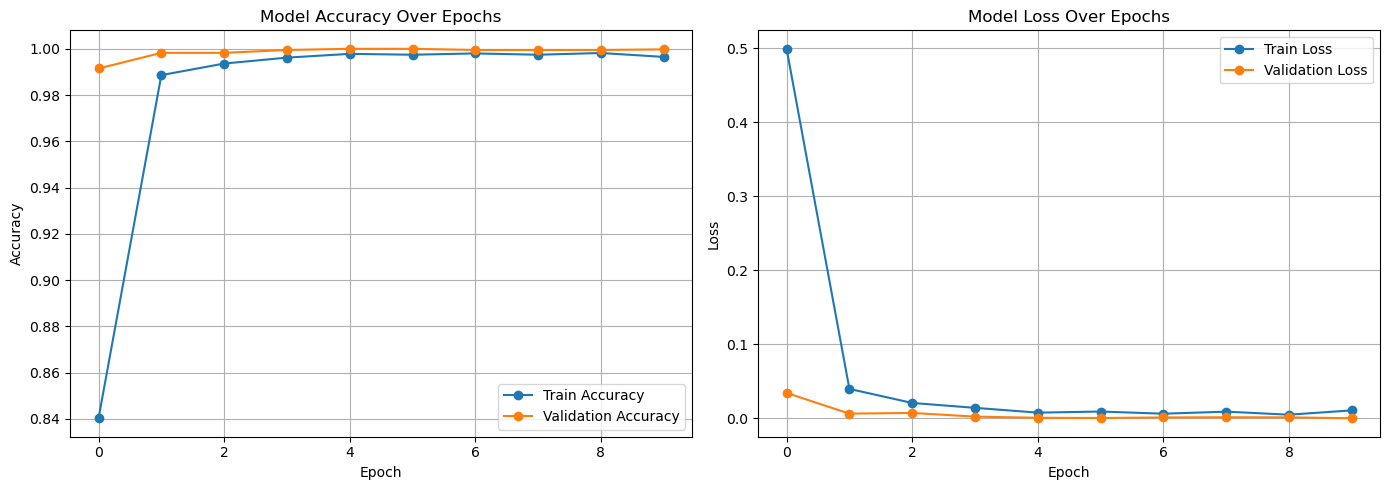

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1️⃣ Plot Accuracy and Loss
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


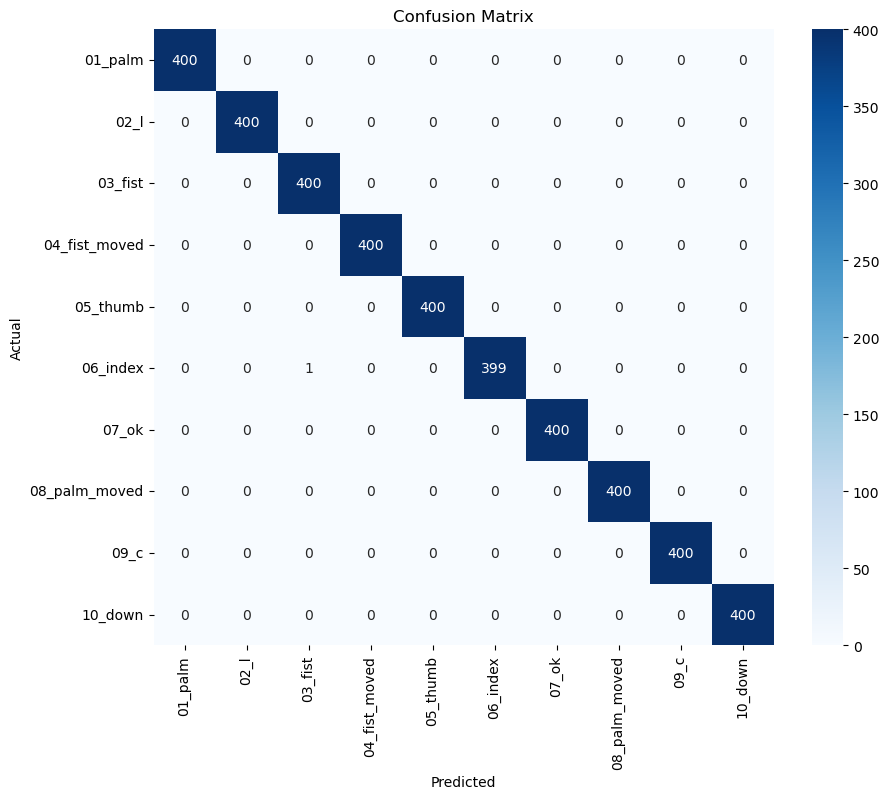

Classification Report:

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       400
         02_l       1.00      1.00      1.00       400
      03_fist       1.00      1.00      1.00       400
04_fist_moved       1.00      1.00      1.00       400
     05_thumb       1.00      1.00      1.00       400
     06_index       1.00      1.00      1.00       400
        07_ok       1.00      1.00      1.00       400
08_palm_moved       1.00      1.00      1.00       400
         09_c       1.00      1.00      1.00       400
      10_down       1.00      1.00      1.00       400

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3️⃣ Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


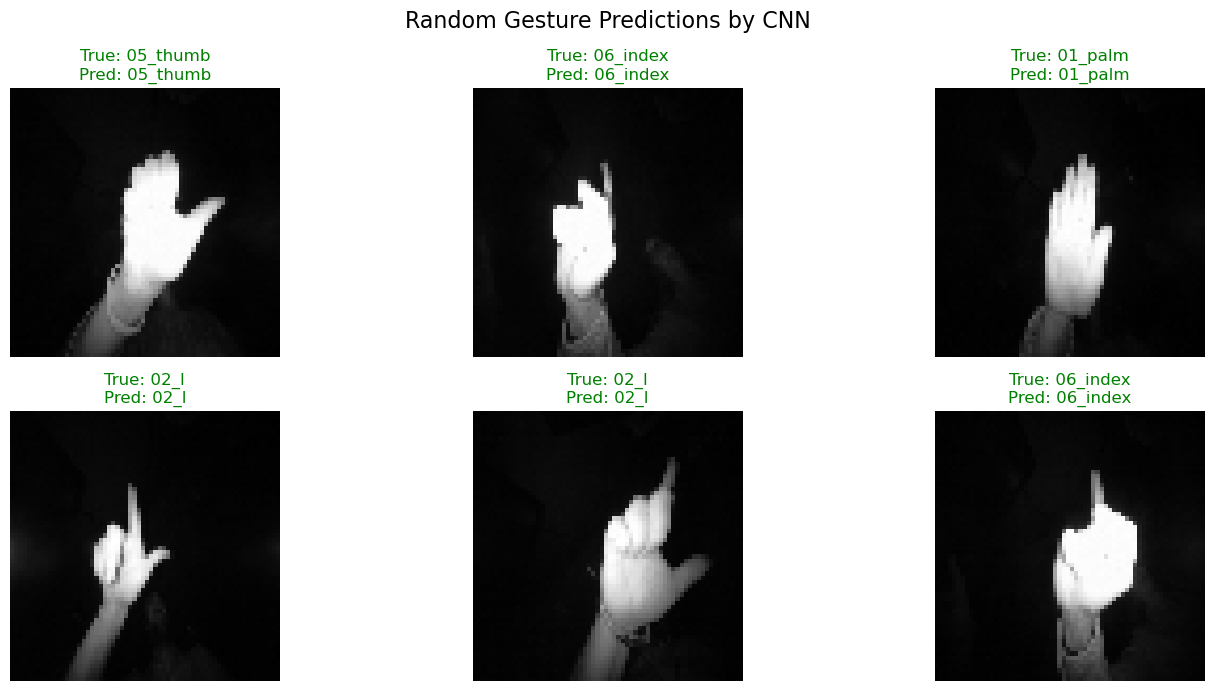

In [11]:
import random

# Show random predictions
num_samples = 6  # You can increase if you want
plt.figure(figsize=(15, 7))

for i in range(num_samples):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx]
    
    true_label = label_encoder.inverse_transform([y_test[idx]])[0]
    
    prediction = model.predict(img.reshape(1, 64, 64, 1))
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color='green' if true_label==predicted_label else 'red')
    plt.axis('off')

plt.suptitle("Random Gesture Predictions by CNN", fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
# ✅ Save model
model.save("gesture_cnn_model.h5")
print("✅ Model saved as gesture_cnn_model.h5")


✅ Model saved as gesture_cnn_model.h5


In [11]:
from tensorflow.keras.models import load_model

# ✅ Load the saved model
model = load_model("gesture_cnn_model.h5")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

IMG_SIZE = 64  # Ensure this matches your training input
print("🎥 Starting Webcam... Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Define Region Of Interest (ROI)
    roi = frame[100:300, 100:300]
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    # Prediction
    prediction = model.predict(reshaped)
    class_index = np.argmax(prediction)
    class_name = label_encoder.inverse_transform([class_index])[0]

    # Draw ROI & prediction
    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 2)
    cv2.putText(frame, f"Gesture: {class_name}", (100, 90),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.imshow("🖐️ Real-Time Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

🎥 Starting Webcam... Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━